# The linguistic diversity of Russia always fascinated me, as there are hundrends of languages used in this vast country. Especially, my intention is to research small and endagered languages. For that, I used data from the 2010 Census of the Russian Federation. http://www.gks.ru/free_doc/new_site/perepis2010/croc/perepis_itogi1612.htm . My original file was in xlsx format, so I saved it first to csv. As it was quite dirty, I dropped some initial rows, a useless column while also I renamed my columns from Russian to English. I ended up with two columns, containing languages and the number of people speaking them. I converted the second column to an integer after some more cleaning of some empty rows, and finally I could navigate all these languages... 

# By filtering my dataframe, I found out languages that are spoken, according to the census data, by 10 people of fewer, which I personally find amazing. Yeniseian languages, despite appearing as exctint and formerly spoken by the Yugh people, one of the southern groups along the Yenisei River in central Siberia, are revealed as still existing. Central Siberian Yupik, an endangered Yupik language spoken by five people of the indigenous Siberian Yupik people along the coast of the Chukchi Peninsula in the Russian Far East and in the villages of Savoonga and Gambell in St. Lawrence Island, still lives. Also, Sireniki Yupik, despite being labelled by Wikipedia as 'an extinct Eskimo–Aleut language' spoken 'in and around the village of Sireniki in Chukotka Peninsula, Chukotka Autonomous Okrug, Russia', the data reveal to us 5 remaining speakers... The same case with the Kerek language of Kamtchatka.

# Made some graphs. This would be an excellent place to embark on a fact-finding mission about the people using these languages. Profiling both them and their communities, in the milieu of the latest FT features on how pipeline contruction affects Siberian communities and also of the Siberian life depiction by Werner Herzog. 

# Fun things to have: -A comparison of how these languages evolved from the 2002 census. Tried getting the data and joining them, but they are only in an online format, so could not make it. For now!
 # Language graphs of Dagestan, a Russian region in the Caucasus with crazy language diversity. But the csv was all messed up! (and not sure how to graph these, anyway)

In [2]:
#A paragraph or two about the work you've done (data sourcing, data cleaning, etc)
#A paragraph or two about your findings
#A list of additional "nice to have" improvements - this can be other graphics, 
#improvements on your existing graphics, or further data analysis.

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.options.display.max_rows = 100

In [3]:
df = pd.read_csv("pub-04-05.csv", encoding='UTF-8')

In [4]:
df.drop(df.index[[0,1,2,3,4,5,113,179,180]], inplace=True)

In [5]:
df = df.drop('Unnamed: 2', 1)

In [6]:
df.rename(columns={'5. ВЛАДЕНИЕ ЯЗЫКАМИ НАСЕЛЕНИЕМ РОССИЙСКОЙ ФЕДЕРАЦИИ': 'Language spoken in the Russian Federation',
                          'Unnamed: 1': 'People speaking the language',
                          }, 
                 inplace=True)

In [7]:
df['People speaking the language'] = df['People speaking the language'].astype(int)

In [8]:
df.sort_values(by='People speaking the language')

,Language spoken in the Russian Federation,People speaking the language
173,югский,1
174,юитский,4
119,сиреникский,5
105,орочский,8
69,керекский,10
17,алюторский,25
168,энецкий,43
163,чулымско-тюркский,44
15,алеутский,45
144,уйльта,47


In [9]:
end_lang = df[df['People speaking the language'] <= 10]

In [10]:
end_lang.sort_values(by='People speaking the language')

,Language spoken in the Russian Federation,People speaking the language
173,югский,1
174,юитский,4
119,сиреникский,5
105,орочский,8
69,керекский,10


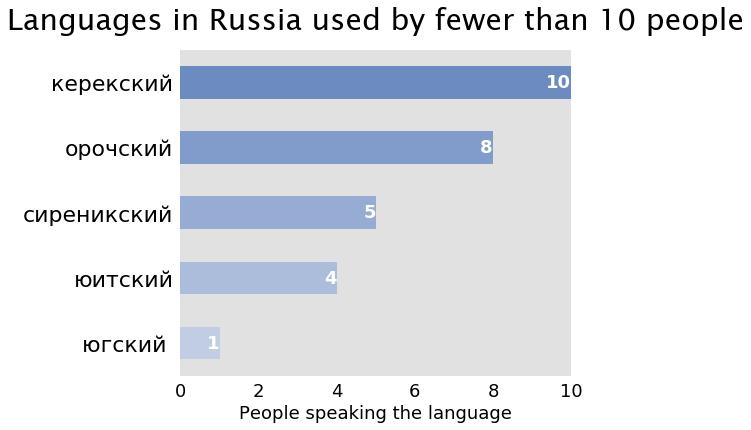

In [11]:
colors = ['#c1cde5', '#acbddb', '#96acd3', '#819ccb', '#6c8bc1']

ax = end_lang.sort_values(by='People speaking the language').plot(x='Language spoken in the Russian Federation', y='People speaking the language', kind='barh', figsize=(7,6), width=0.5, color=colors, legend=False)

for i, bar in enumerate(ax.patches):
   #print(i)
    x_pos = bar.get_width()
    ax.text(x_pos, i, str(int(round(x_pos))), va= 'center', ha = 'right', color = 'white', fontweight = 'bold', size=18)

ax.set_title ('Languages in Russia used by fewer than 10 people', pad = 20)
ax.legend().set_visible(False)
ax.title.set_fontsize(30)
ax.title.set_fontname('Lucida Sans')

plt.xticks(size = 18)
plt.yticks(size = 22)

ax.set_xlabel("People speaking the language", size=18)

ax.tick_params(which='major', left=False, bottom=False)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.5)
ax.set_facecolor('#e1e1e1')

ax.grid(False, axis='x')
ax.set_axisbelow(False)
ax.set_xlim(0, 10)
ax.yaxis.label.set_visible(False)

In [12]:
few = df[df['People speaking the language'] < 200]

In [13]:
few.sort_values(by='People speaking the language')

,Language spoken in the Russian Federation,People speaking the language
173,югский,1
174,юитский,4
119,сиреникский,5
105,орочский,8
69,керекский,10
17,алюторский,25
168,энецкий,43
163,чулымско-тюркский,44
15,алеутский,45
144,уйльта,47


In [14]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

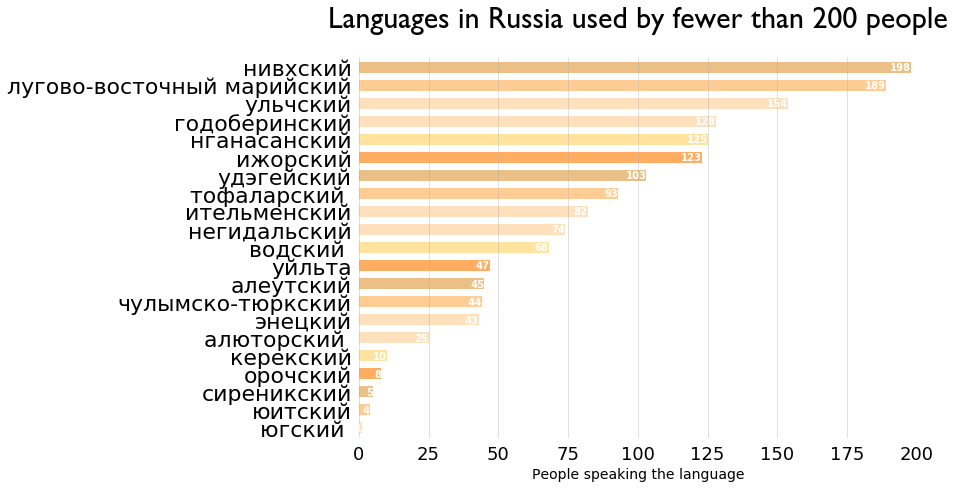

In [15]:
colors = ['#ffe0bd', '#ffcd94', '#eac086', '#ffad60', '#ffe39f']

ax = few.sort_values(by='People speaking the language').plot(x='Language spoken in the Russian Federation', y='People speaking the language', kind='barh', figsize=(10,7), color=colors, width=0.6, legend=False)

for i, bar in enumerate(ax.patches):
   #print(i)
    x_pos = bar.get_width()
    ax.text(x_pos, i, str(int(round(x_pos))), va= 'center', ha = 'right', color = 'white', fontweight = 'bold')

ax.set_title ('Languages in Russia used by fewer than 200 people', pad = 30)
ax.legend().set_visible(False)
ax.title.set_fontsize(30)
ax.title.set_fontname('Gill Sans MT')

ax.set_xlabel("People speaking the language", size=14)

plt.xticks(size = 18)
plt.yticks(size = 22)

ax.tick_params(which='major', left=False, bottom=False)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='major', left=False, bottom=False, grid_alpha=0.5)
ax.set_facecolor('#ffffff')

ax.grid(True, axis='x')
ax.set_axisbelow(False)
ax.set_xlim(0, 200)
ax.yaxis.label.set_visible(False)

In [16]:
df['Language spoken in the Russian Federation'].value_counts()

болгарский                    1
курдский                      1
корейский                     1
нивхский                      1
венгерский                    1
юитский                       1
шведский                      1
нидерландский                 1
литовский                     1
сиреникский                   1
удмуртский                    1
ижорский                      1
андийский                     1
итальянский                   1
дари                          1
бирманский                    1
лугово-восточный марийский    1
цыганский                     1
чулымско-тюркский             1
тиндальский                   1
абазинский                    1
арабский                      1
татский                       1
долганский                    1
тувинский                     1
каракалпакский                1
суахили                       1
телеутский                    1
мансийский                    1
якутский                      1
багвалинский                  1
малайски

In [17]:
data_2 = pd.read_csv("database_file.csv")

In [18]:
data_2.rename(columns={'3645': '1',
                       'knw': '2',
                       '!Xun': '3',
                       'Ju; !Xun (Ekoka); Kung-Ekoka; !Kung; Ekoka-!Xû; Kung; !Ku; !Xu; !Hu; Qxü !Khung; !Xung; Ekoka;': '4',
                       'Vulnerable (20 percent certain, based on the evidence available)': '5',
                       '14,000-18,000': '5',
                       "Kx'a": '6',
                       'Southeastern !Xun, Northwestern !Xun, Central !Xun': '7',
                       'South Africa;Namibia;Angola;': 'Country',
                       '-28.74358,23.983154; -17.560247, 18.050537; -19.621892, 20.253296; -21.749296, 19.896240': 'longlag'
                          }, 
                 inplace=True)

In [19]:
russian_lang = data_2[data_2['Country'] == 'Russia;']

In [20]:
russian_lang.count()

1             79
2             76
3             79
4             79
5             79
5             76
6             79
7             45
Unnamed: 8    27
Unnamed: 9    18
Country       79
Africa        79
longlag       78
dtype: int64

# Russia has 79 endagered languages

In [21]:
import re

In [22]:
lang_1 = russian_lang[russian_lang['4'].str.contains(r"керекский")]

In [23]:
lang_2 = russian_lang[russian_lang['4'].str.contains(r"орочский")]

In [24]:
lang_3 = russian_lang[russian_lang['4'].str.contains(r"Siren")]

In [25]:
lang_4 = russian_lang[russian_lang['4'].str.contains(r"Yupik")]

In [26]:
lang_5 = russian_lang[russian_lang['4'].str.contains(r"югский")]

In [27]:
test_lang_with_coord = [lang_1, lang_2, lang_3, lang_4, lang_5]

In [28]:
lang_with_coord = pd.concat(test_lang_with_coord)

In [29]:
lang_with_coord

,1,2,3,4,5,5,6,7,Unnamed: 8,Unnamed: 9,Country,Africa,longlag
1379,2429,krk,Kerek,керекский язык,"Critically Endangered (80 percent certain, bas...",<10,Chukotko-Kamchatkan; Chukotkan,Khatyrka; Mainypilgino;,Kerek used to be classified as a dialect of Ch...,NaN,Russia;,Caucasus;Europe;East Asia,"62.25,175.0"
2284,3038,oac,Oroch,Orochi; орочский язык; Sprache der Oročonen; O...,"Severely Endangered (80 percent certain, based...",<150,Tungusic; Southern Tungusic; Amur Tungusic\r\n,Kjakela; Namunka; Orichen; Tez,NaN,NaN,Russia;,Caucasus;Europe;East Asia,"50.3333333333,137.5"
2683,10829,ysr,Sirenikski,Sirenik; Old Sirenik;,Dormant (),NaN,Eskimo-Aleut; Eskimo,Sireniki; Imtuk,Former language of the village of Sireniki and...,Sirenikski represents a third branch of the Es...,Russia;,Caucasus;Europe;East Asia,"64.416667, -173.95"
2059,1714,ynk,Naukan Yupik,Naukanski; East Cape Yupik; East Cape; Науканс...,"Endangered (20 percent certain, based on the e...",~200,Eskimo-Aleut; Eskimo; Yupik,NaN,NaN,NaN,Russia;,Caucasus;Europe;East Asia,"66.0,-172.0"
3358,3162,yuu,Yug,Yugh; Southern Ket; Sym Ket; D'uk; югский язык;,"Critically Endangered (80 percent certain, bas...",<5,Yeniseian; Northern Yeniseian,NaN,NaN,NaN,Russia;,Caucasus;Europe;East Asia,"61.0,90.0"


In [30]:
lang_with_coord.to_csv('lang_with_coord.csv')

In [ ]:
#Then I manually make new csv files for QGIS....